In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TimeSeriesAnalysis/passangers_data.csv',parse_dates = True, index_col = 'Month')
data.shape


(144, 1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [ ]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
data.dtypes

,0
#Passengers,int64


In [ ]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

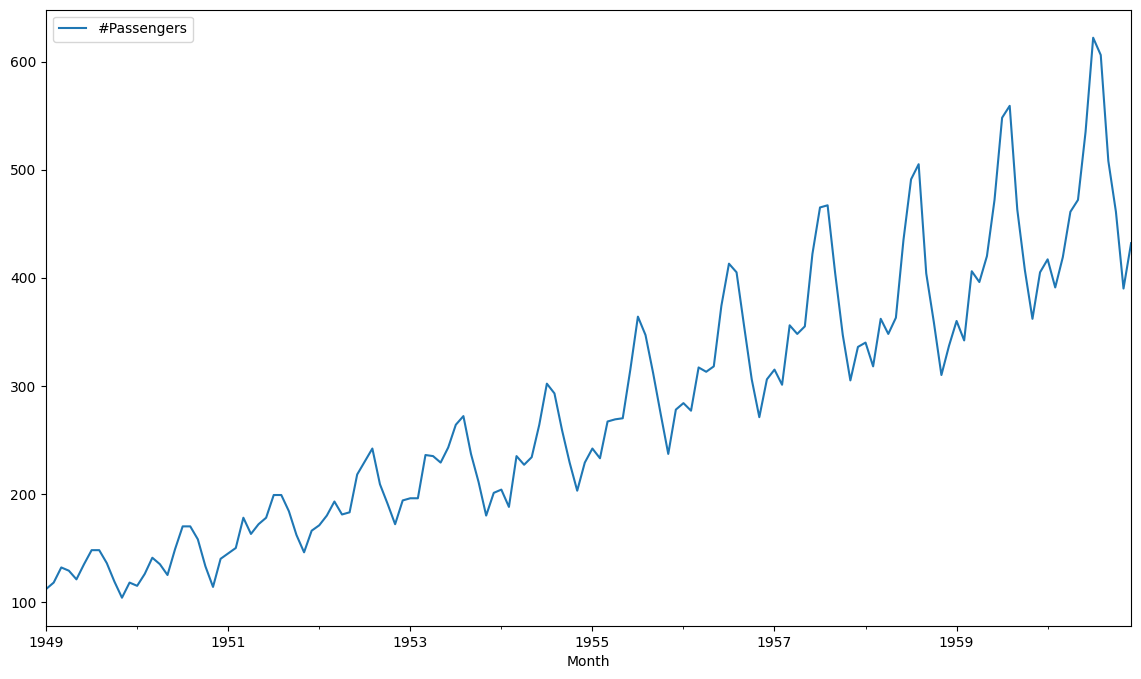

In [ ]:
data.plot(figsize = (14,8))
plt.show()


In [ ]:
data.index.freq = 'MS'
print(data.index)

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')


In [ ]:
data_passengers = pd.Series(data['#Passengers'])
data_passengers.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
train = data[:120]
test = data[120:]

In [ ]:
def ses_optimizer(train,alphas, step = 24):
  best_alpha, best_mae = None, float('inf')
  for alpha in alphas:
    ses_model = SimpleExpSmoothing(train).fit(smoothing_level = alpha)
    y_pred = ses_model.forecast(step)
    mae = mean_absolute_error(test,y_pred)
    if mae < best_mae:
      best_alpha, best_mae = alpha, mae
    print('alpha: ',round(alpha,2),', mae: ',round(mae,4))
  print('Best_alpha:',round(best_alpha,2),'Best_mae: ',round(best_mae,4))
  return best_alpha, best_alpha

alphas = np.arange(0.01,1,0.1)
best_alpha, best_mae = ses_optimizer(train, alphas, step = 24)

alpha:  0.01 , mae:  225.5863
alpha:  0.11 , mae:  82.528
alpha:  0.21 , mae:  82.8979
alpha:  0.31 , mae:  89.8377
alpha:  0.41 , mae:  99.0585
alpha:  0.51 , mae:  107.5558
alpha:  0.61 , mae:  113.7514
alpha:  0.71 , mae:  117.2224
alpha:  0.81 , mae:  118.1776
alpha:  0.91 , mae:  117.2438
Best_alpha: 0.11 Best_mae:  82.528


In [ ]:
ses_model = SimpleExpSmoothing(train).fit(smoothing_level = best_alpha)
y_pred = ses_model.forecast(24)

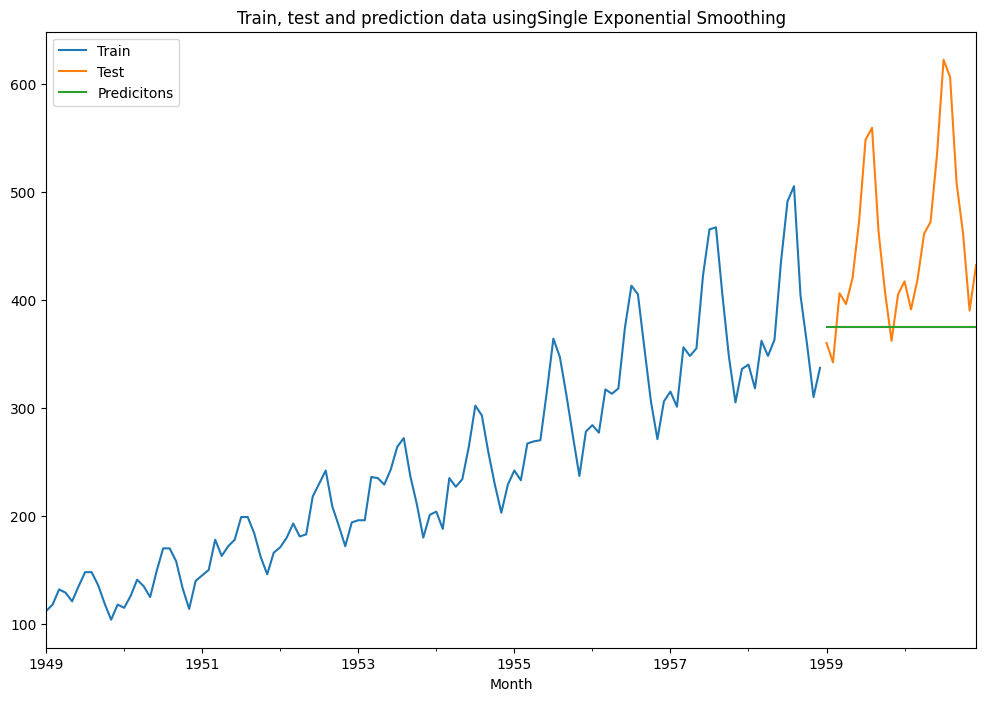

In [ ]:
def plot_predictions(y_pred,label):
  plt.figure(figsize = (12,8))
  train['#Passengers'].plot(legend = True, label = 'Train')
  test['#Passengers'].plot(legend = True, label  = 'Test')
  y_pred.plot(legend = True, label = 'Predicitons')
  plt.title('Train, test and prediction data using'+label)
  plt.show()

plot_predictions(y_pred, 'Single Exponential Smoothing')

In [ ]:
def des_optimizer(train, alphas, betas, step = 24):
  best_alpha, best_beta, best_mae = None, None, float('inf')
  for alpha in alphas:
    for beta in betas:
      des_model = ExponentialSmoothing(train, trend = 'add').fit(smoothing_level = alpha,
                                                                 smoothing_trend=beta)
      y_pred = des_model.forecast(step)
      mae = mean_absolute_error(test,y_pred)
      if mae < best_mae:
        best_alpha, best_beta, best_mae = alpha,beta,mae

      print('alpha: ',round(alpha,2),'beta: ',round(beta,2),'mae: ',round(mae,4))
  print('Best_alpha: ',round(best_alpha,2),'Best_beta: ',round(best_beta,2),'Best_mae: ',round(best_mae,4))
  return best_alpha, best_beta, best_mae

alphas = np.arange(0.01,1,0.1)
betas = np.arange(0.01,1,0.1)

best_alpha, best_beta, best_mae = des_optimizer(train, alphas, betas,step = 24)




alpha:  0.01 beta:  0.01 mae:  54.9512
alpha:  0.01 beta:  0.11 mae:  54.1036
alpha:  0.01 beta:  0.21 mae:  55.5568
alpha:  0.01 beta:  0.31 mae:  57.3247
alpha:  0.01 beta:  0.41 mae:  57.7931
alpha:  0.01 beta:  0.51 mae:  57.9968
alpha:  0.01 beta:  0.61 mae:  57.9637
alpha:  0.01 beta:  0.71 mae:  57.5635
alpha:  0.01 beta:  0.81 mae:  57.3334
alpha:  0.01 beta:  0.91 mae:  57.8983
alpha:  0.11 beta:  0.01 mae:  55.0309
alpha:  0.11 beta:  0.11 mae:  58.4728
alpha:  0.11 beta:  0.21 mae:  69.6339
alpha:  0.11 beta:  0.31 mae:  72.555
alpha:  0.11 beta:  0.41 mae:  78.8168
alpha:  0.11 beta:  0.51 mae:  81.996
alpha:  0.11 beta:  0.61 mae:  77.2262
alpha:  0.11 beta:  0.71 mae:  71.5042
alpha:  0.11 beta:  0.81 mae:  69.0258
alpha:  0.11 beta:  0.91 mae:  67.8408
alpha:  0.21 beta:  0.01 mae:  57.1824
alpha:  0.21 beta:  0.11 mae:  74.992
alpha:  0.21 beta:  0.21 mae:  95.9492
alpha:  0.21 beta:  0.31 mae:  115.3164
alpha:  0.21 beta:  0.41 mae:  139.4303
alpha:  0.21 beta:  0.51 m

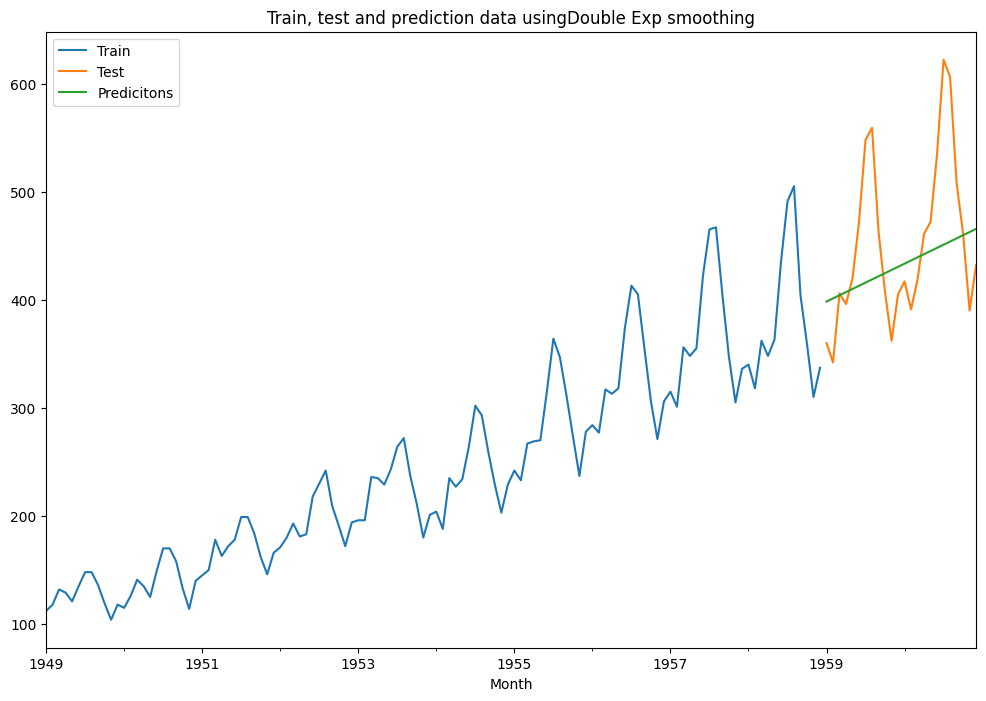

In [ ]:
des_model = ExponentialSmoothing(train, trend = 'add').fit(smoothing_level = best_alpha,
                                                           smoothing_trend = best_beta)

y_pred = des_model.forecast(24)
plot_predictions(y_pred, 'Double Exp smoothing')

In [ ]:
def tes_optimizer(train, abg, step = 24):
  best_alpha, best_beta, best_gamma, best_mae = None, None, None, float('inf')
  for comb in abg:
    tes_model = ExponentialSmoothing(train, trend = 'add', seasonal = 'add',seasonal_periods = 12).fit(smoothing_level= comb[0],
                                                                                 smoothing_trend = comb[1],
                                                                                 smoothing_seasonal=comb[2])

    y_pred = tes_model.forecast(step)
    mae = mean_absolute_error(test,y_pred)
    if mae < best_mae:
      best_alpha, best_beta, best_gamma, best_mae = comb[0], comb[1],comb[2],mae
    print([round(comb[0],2),round(comb[1],2),round(comb[2],2),round(mae,4)])
  print('Best_alpha: ',round(best_alpha,2), 'best_beta: ',round(best_beta,2),'best_gamma: ',round(best_gamma,2),'Best_mae: ',round(best_mae,4))
  return best_alpha, best_beta, best_gamma, best_mae
alphas = betas = gammas = np.arange(0.1,1,0.1)
abg = list(itertools.product(alphas, betas, gammas))

best_alpha, best_beta, best_gamma, best_mae = tes_optimizer(train, abg, step = 24)




[np.float64(0.1), np.float64(0.1), np.float64(0.1), 36.8284]
[np.float64(0.1), np.float64(0.1), np.float64(0.2), 35.3604]
[np.float64(0.1), np.float64(0.1), np.float64(0.3), 34.8767]
[np.float64(0.1), np.float64(0.1), np.float64(0.4), 35.1138]
[np.float64(0.1), np.float64(0.1), np.float64(0.5), 35.91]
[np.float64(0.1), np.float64(0.1), np.float64(0.6), 37.0285]
[np.float64(0.1), np.float64(0.1), np.float64(0.7), 38.7169]
[np.float64(0.1), np.float64(0.1), np.float64(0.8), 40.5403]
[np.float64(0.1), np.float64(0.1), np.float64(0.9), 42.5466]
[np.float64(0.1), np.float64(0.2), np.float64(0.1), 53.0183]
[np.float64(0.1), np.float64(0.2), np.float64(0.2), 50.775]
[np.float64(0.1), np.float64(0.2), np.float64(0.3), 49.7007]
[np.float64(0.1), np.float64(0.2), np.float64(0.4), 49.6992]
[np.float64(0.1), np.float64(0.2), np.float64(0.5), 50.7454]
[np.float64(0.1), np.float64(0.2), np.float64(0.6), 52.1731]
[np.float64(0.1), np.float64(0.2), np.float64(0.7), 53.8527]
[np.float64(0.1), np.float6

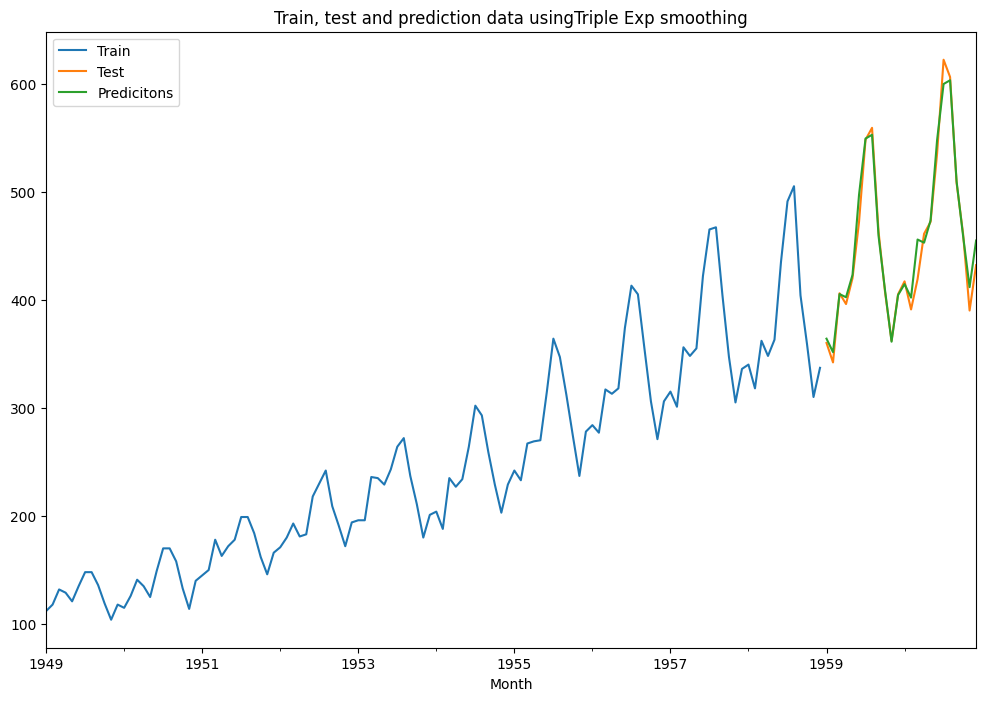

In [ ]:
tes_model = ExponentialSmoothing(train, trend = 'add', seasonal = 'add', seasonal_periods = 12).fit(smoothing_level = best_alpha,
                                                                                                    smoothing_trend = best_beta,
                                                                                                    smoothing_seasonal = best_gamma)
y_pred = tes_model.forecast(24)

plot_predictions(y_pred, 'Triple Exp smoothing')


In [ ]:
def arima_optimizer(train, p,d,q,step = 24):
   # p - order for ar model (pacf lags)
    # d - d is order for intergration
    # q - order for ma model (acf lags)
  best_p, best_d, best_q, best_aic = None, None, None, float('inf')
  for param in itertools.product(p,d,q):
    try:
      arima_model = ARIMA(train, order = param).fit()
      y_pred = arima_model.forecast(step)
      aic = arima_model.aic
      if aic < best_aic:
        best_p, best_d, best_q, best_aic = param[0], param[1], param[2], aic
      print([param[0],param[1],param[2],round(aic,2)])
    except:
      continue
  print('Best_p: ', best_p, 'best_d: ',best_d, 'best_q: ',best_q, 'best_aic: ',round(best_aic,2))
  return best_p, best_d, best_q, best_aic


p = d = q = range(0,6)

best_p, best_d, best_q, best_aic = arima_optimizer(train, p,d,q,step = 24)
arima_model = ARIMA(train, order = (best_p, best_d, best_q)).fit()

y_pred = arima_model.forecast(24)

[0, 0, 0, np.float64(1436.33)]
[0, 0, 1, np.float64(1295.42)]
[0, 0, 2, np.float64(1229.22)]
[0, 0, 3, np.float64(1169.78)]
[0, 0, 4, np.float64(1191.75)]
[0, 0, 5, np.float64(1145.69)]
[0, 1, 0, np.float64(1138.81)]
[0, 1, 1, np.float64(1127.02)]
[0, 1, 2, np.float64(1126.97)]
[0, 1, 3, np.float64(1125.45)]
[0, 1, 4, np.float64(1107.49)]
[0, 1, 5, np.float64(1106.24)]
[0, 2, 0, np.float64(1171.65)]
[0, 2, 1, np.float64(1136.52)]
[0, 2, 2, np.float64(1124.36)]
[0, 2, 3, np.float64(1124.57)]
[0, 2, 4, np.float64(1114.69)]
[0, 2, 5, np.float64(1101.67)]
[0, 3, 0, np.float64(1263.95)]
[0, 3, 1, np.float64(1169.49)]
[0, 3, 2, np.float64(1140.39)]
[0, 3, 3, np.float64(1127.31)]
[0, 3, 4, np.float64(1128.09)]
[0, 3, 5, np.float64(1123.42)]
[0, 4, 0, np.float64(1380.24)]
[0, 4, 1, np.float64(1260.84)]
[0, 4, 2, np.float64(1171.98)]
[0, 4, 3, np.float64(1148.8)]
[0, 4, 4, np.float64(1134.65)]
[0, 4, 5, np.float64(1135.91)]
[0, 5, 0, np.float64(1504.35)]
[0, 5, 1, np.float64(1375.62)]
[0, 5, 2,

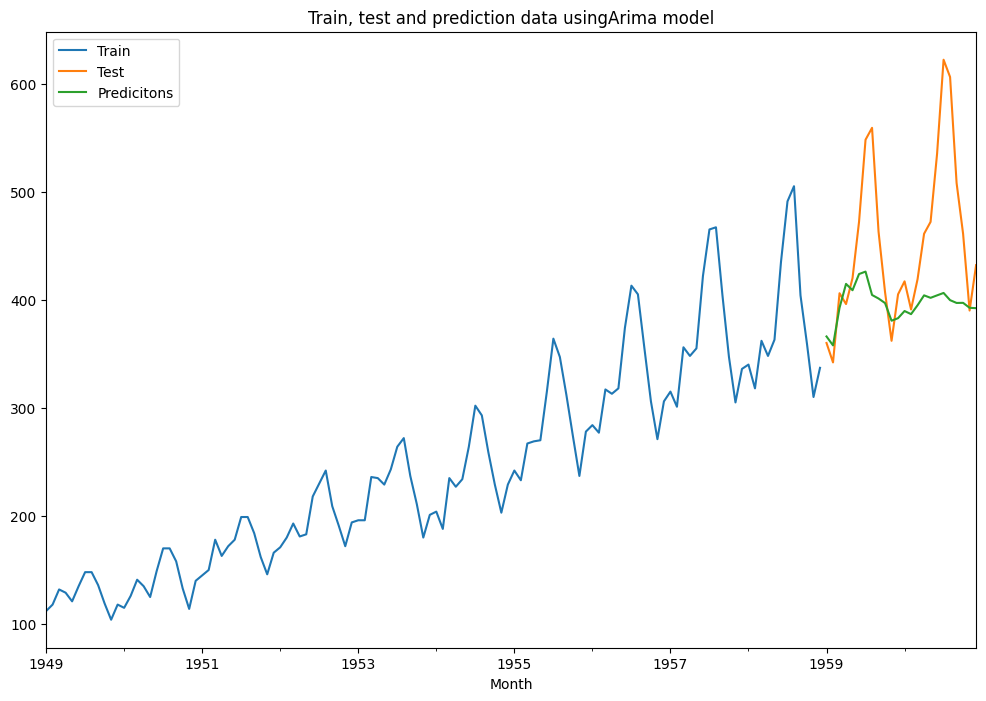

In [ ]:
plot_predictions(y_pred, 'Arima model')

In [ ]:
def check_stationary(timeseries):
  result = adfuller(timeseries)
  print('ADF stats: ',result[0])
  print('p-value: ',result[1])
  print('Critical_value: ')
  for key, value in result[4].items():
    print(f'\t{key}:{value}')
  if result[1]<=0.05:
    print('The data is stationary since p <0.05')
  else:
    print('The data is not stationary')

In [ ]:
check_stationary(data)


ADF stats:  0.8153688792060498
p-value:  0.991880243437641
Critical_value: 
	1%:-3.4816817173418295
	5%:-2.8840418343195267
	10%:-2.578770059171598
The data is not stationary


In [ ]:
# 12 seasonal differencing
data['Passenger 12 diff'] = data['#Passengers']-data['#Passengers'].shift(12)
data.head(24)

,#Passengers,Passenger 12 diff
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN
1949-06-01,135,NaN
1949-07-01,148,NaN
1949-08-01,148,NaN
1949-09-01,136,NaN


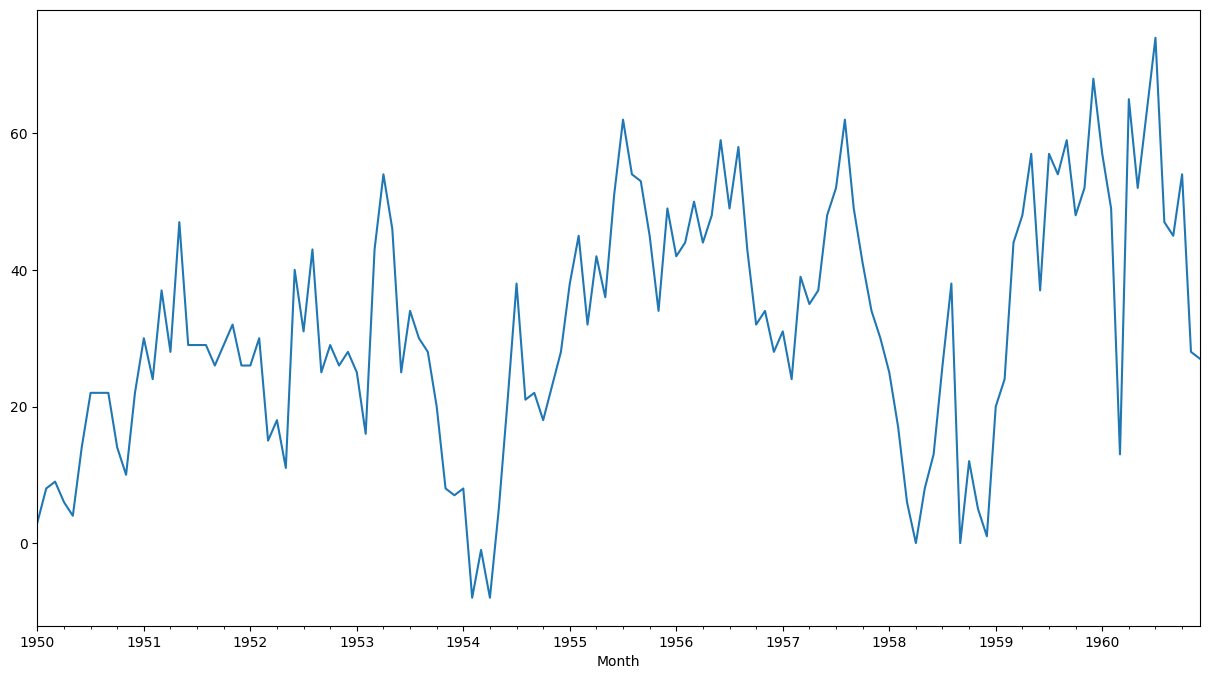

In [ ]:
data['Passenger 12 diff'].dropna().plot(figsize = (15,8))
plt.show()

In [ ]:
check_stationary(data['Passenger 12 diff'].dropna())

ADF stats:  -3.383020726492481
p-value:  0.011551493085514952
Critical_value: 
	1%:-3.4816817173418295
	5%:-2.8840418343195267
	10%:-2.578770059171598
The data is stationary since p <0.05


In [ ]:
data = data.dropna()
data.head()

,#Passengers,Passenger 12 diff
Month,,
1950-01-01,115,3.0
1950-02-01,126,8.0
1950-03-01,141,9.0
1950-04-01,135,6.0
1950-05-01,125,4.0


In [ ]:
data = data.drop(['#Passengers'],axis = 1)


In [ ]:
data.isnull().sum()

,0
Passenger 12 diff,0


In [ ]:
data.dtypes

,0
Passenger 12 diff,float64


In [ ]:
train_new = data[:len(data)-14]
test_new = data[len(data)-14:]

In [ ]:
train_new.head()

,Passenger 12 diff
Month,
1950-01-01,3.0
1950-02-01,8.0
1950-03-01,9.0
1950-04-01,6.0
1950-05-01,4.0


In [ ]:
best_p, best_d, best_q, best_aic = arima_optimizer(train_new,p, d, q, step =24)
new_arima_model = ARIMA(train_new, order = (best_p, best_d, best_q)).fit()
new_y_pred = new_arima_model.forecast(24)

[0, 0, 0, np.float64(1000.33)]
[0, 0, 1, np.float64(944.73)]
[0, 0, 2, np.float64(907.64)]
[0, 0, 3, np.float64(893.88)]
[0, 0, 4, np.float64(894.4)]
[0, 0, 5, np.float64(893.95)]
[0, 1, 0, np.float64(889.54)]
[0, 1, 1, np.float64(885.13)]
[0, 1, 2, np.float64(886.68)]
[0, 1, 3, np.float64(882.42)]
[0, 1, 4, np.float64(883.05)]
[0, 1, 5, np.float64(884.78)]
[0, 2, 0, np.float64(988.41)]
[0, 2, 1, np.float64(889.56)]
[0, 2, 2, np.float64(885.58)]
[0, 2, 3, np.float64(886.96)]
[0, 2, 4, np.float64(883.17)]
[0, 2, 5, np.float64(884.07)]
[0, 3, 0, np.float64(1118.02)]
[0, 3, 1, np.float64(987.65)]
[0, 3, 2, np.float64(895.52)]
[0, 3, 3, np.float64(892.51)]
[0, 3, 4, np.float64(893.42)]
[0, 3, 5, np.float64(890.61)]
[0, 4, 0, np.float64(1253.91)]
[0, 4, 1, np.float64(1116.05)]
[0, 4, 2, np.float64(991.06)]
[0, 4, 3, np.float64(907.56)]
[0, 4, 4, np.float64(905.38)]
[0, 4, 5, np.float64(905.75)]
[0, 5, 0, np.float64(1390.46)]
[0, 5, 1, np.float64(1250.46)]
[0, 5, 2, np.float64(1117.72)]
[0, 

In [ ]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  120
Model:                 ARIMA(4, 1, 5)   Log Likelihood                -529.062
Date:                Tue, 01 Jul 2025   AIC                           1078.124
Time:                        14:55:44   BIC                           1105.915
Sample:                    01-01-1949   HQIC                          1089.409
                         - 12-01-1958                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7135      0.071     10.033      0.000       0.574       0.853
ar.L2         -0.3200      0.096     -3.342      0.001      -0.508      -0.132
ar.L3          0.5944      0.125      4.749      0.000       0.349       0.840
ar.L4         -0.6753      0.073     -9.205      0.000      -0.819      -0.532
ma.L1         -0.6245      2.756     -0.227      0.821      -6.026       4.777
ma.L2         -0.0309      4.639     -0.007      0.995      -9.123       9.061
ma.L3         -0.7881     10.847     -0.073      0.942     -22.048      20.472
ma.L4          0.2289      0.418      0.547      0.584      -0.591       1.048
ma.L5          0.6163      4.948      0.125      0.901      -9.082      10.314
sigma2       393.0028   3150.002      0.125      0.901   -5780.888    6566.894
===================================================================================
Ljung-Box (L1) (Q):                   0.74   Jarque-Bera (JB):                 6.42
Prob(Q):                              0.39   Prob(JB):                         0.04
Heteroskedasticity (H):               6.02   Skew:                             0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

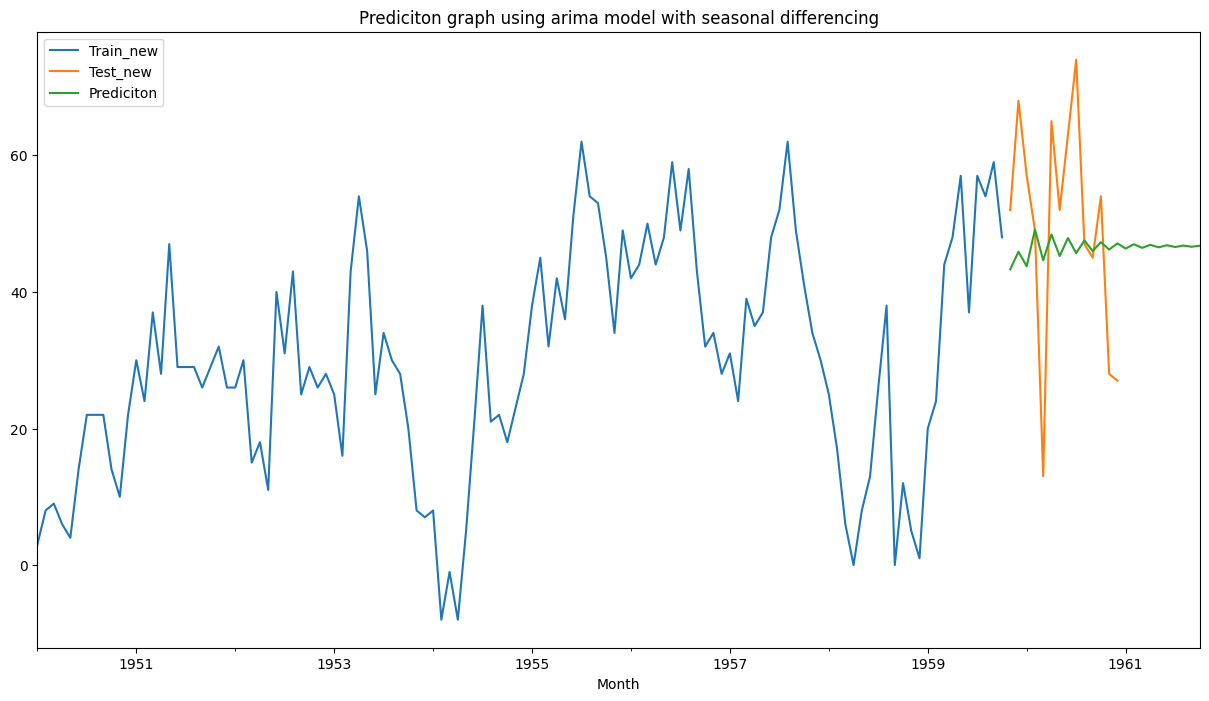

In [ ]:
plt.figure(figsize =(15,8))
train_new['Passenger 12 diff'].plot(legend = True, label = 'Train_new')
test_new['Passenger 12 diff'].plot(legend = True, label  = 'Test_new')
new_y_pred.plot(legend = True, label = 'Prediciton')
plt.title('Prediciton graph using arima model with seasonal differencing')
plt.show()

In [ ]:
len(new_y_pred)

24

In [ ]:
data_passengers.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
last_24 = data_passengers.iloc[-24:].copy()

forecast_original = []
for i in range(24):
  value = new_y_pred[i]+last_24[i]
  forecast_original.append(value)

forecast_index = new_y_pred.index-pd.DateOffset(months =10 )
y_pred_original = pd.Series(forecast_original, index = forecast_index)

In [ ]:
y_pred_original

,0
1959-01-01,403.301708
1959-02-01,387.884508
1959-03-01,449.756734
1959-04-01,445.151265
1959-05-01,464.638583
1959-06-01,520.413573
1959-07-01,593.255684
1959-08-01,606.897350
1959-09-01,508.687520
1959-10-01,454.536107


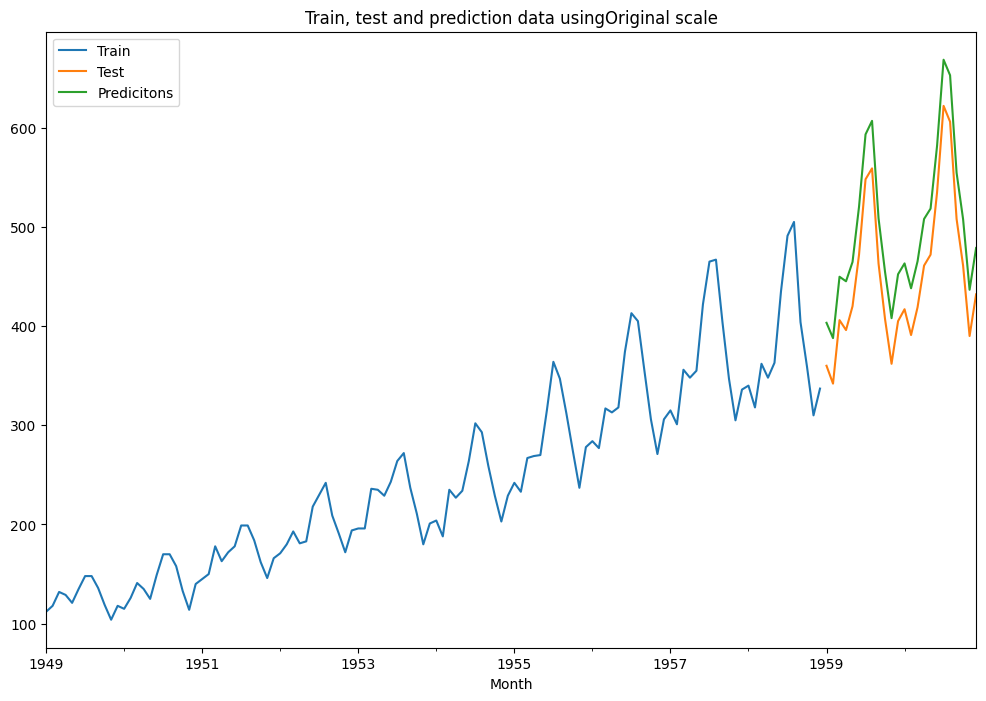

In [ ]:
plot_predictions(y_pred_original,label = 'Original scale')